# plt.table()

- 그래프와 table을 동시에 보여줌으로 해서 정보전달의 효율성과 타당성 추가!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

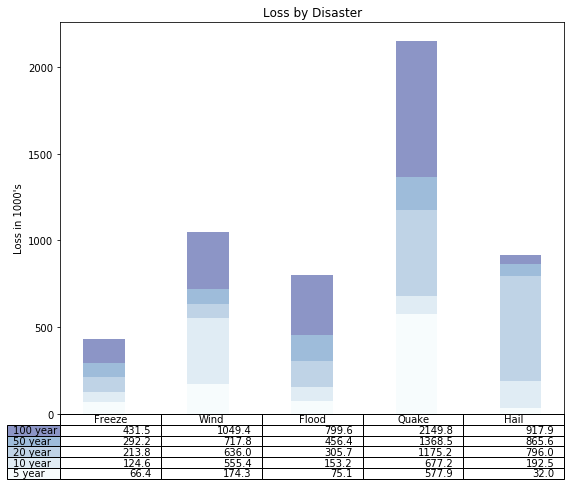

In [7]:
# 도화지 크기를 정한다
plt.figure(figsize=(10,8))

# 우리가 사용할 데이터 # 이 모양 그대로 그림
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

# table의 columns 과 rows 를 정한다
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# 색을 정한다 / rows 별로 색을 다르게 만든다
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))        

# bar 그릴때 x 값을 만듭니다
index = np.arange(len(columns)) + 0.3

# stacked bar chart의 시작점
y_offset = np.zeros(len(columns)) # 모두 0 인 array 를 만듬

# bar를 그리고 table을 위한 text를 만듬
cell_text = []
for row in range(len(data)):
    plt.bar(index, data[row], 0.4, bottom = y_offset, color = colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
plt.table(cellText = cell_text,
                      rowLabels = rows,
                      rowColours = colors,
                      colLabels = columns,
                      loc = 'bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left = 0.2, bottom = 0.2)

plt.ylabel("Loss in 1000\'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()